## Prática 4: Estimando e visualizando aumento do nível do mar no oceano mundial

Lara Schlumbom, outubro de 2023

In [1]:
# importando as bibliotecas necessárias

import xarray as xr
import numpy as np
import cmocean as cmo
from scipy import signal
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Passo 1: plotar a anomalia do nível do mar para um mês

#### 1.1 Carregar os dados

In [2]:
# carregando os dados para outubro de 2004
ds = xr.open_dataset('/data/CMEMS/monthly_sealevel/dt_global_allsat_msla_h_y2004_m10.nc')
ds

<xarray.Dataset>
Dimensions:           (time: 1, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2004-10-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    sla               (time, latitude, longitude) float64 ...
Attributes: (12/42)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               2004-10-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             2004-10-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

#### 1.3 Anomalia do nível do mar para outubro de 2004

Text(0.5, 1.0, 'Averaged Sea Level Anomalies 2004/10')

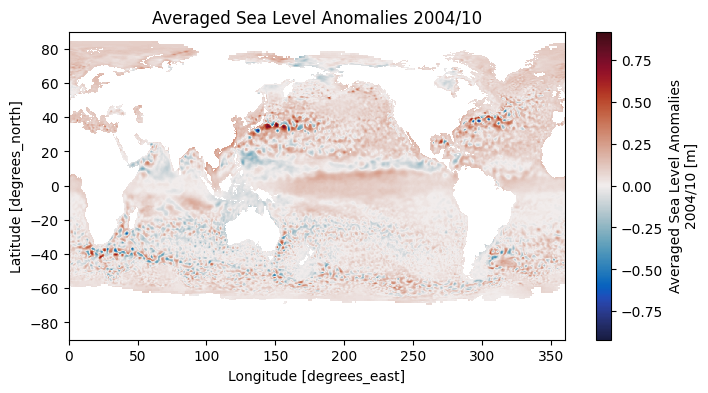

In [3]:
plt.figure(figsize = (8,4))

# plotar com a função integrada do xarray
ds.sla.plot(cmap = cmo.cm.balance)
plt.title(ds.sla.long_name)

# plt.savefig('p4_avg_sla_oct2004')

### Passo 2: plotar 28 anos de dados

#### 2.1 Carregar os dados

In [4]:
# abrir um dataset multifile, abre todos os arquvios de dados para o período
mf_ds = xr.open_mfdataset('/data/CMEMS/monthly_sealevel/*.nc')
mf_ds

<xarray.Dataset>
Dimensions:           (time: 329, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-05-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               (time) int32 -2147483647 -2147483647 ... -2147483647
    climatology_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds          (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds          (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla               (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               1993-01-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             1993-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

#### 2.3 Média anual do nível do mar

In [5]:
annual_mean = mf_ds.resample(time = 'Y').mean()
annual_mean

<xarray.Dataset>
Dimensions:    (time: 28, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2020-12-31
Data variables:
    crs        (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               1993-01-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             1993-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

### Passo 3: Aumento do nível do mar ao longo do tempo

#### 3.1 Nível médio do mar em 1993 e 2020

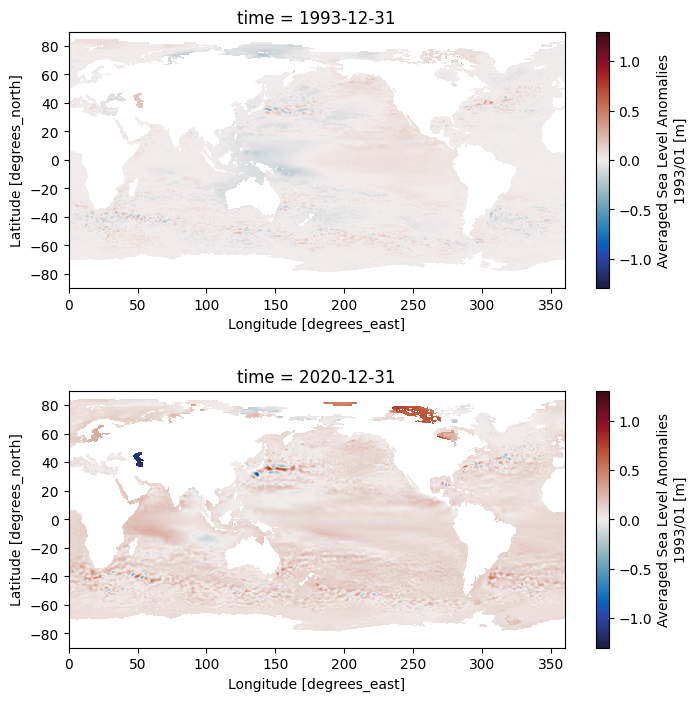

In [6]:
fig = plt.figure(figsize = (8,8))
plt.subplots_adjust(hspace=.4)

# set year selections and add key word arguments
start_year = annual_mean.sel(time='1993')
end_year = annual_mean.sel(time='2020')
kwargs = dict(cmap = cmo.cm.balance, vmin=-1.3, vmax=1.3)

# selecionar o tempo = 1993, os valores de anomalia do nível do mar e plotar no subplot
ax1 = fig.add_subplot(211)
start_year.sla.plot(**kwargs)

# selecionar o tempo = 2020, os valores de anomalia do nível do mar e plotar no subplot
ax2 = fig.add_subplot(212)
end_year.sla.plot(**kwargs)

# plt.savefig('p4_avg_sla_1993_2020')

#### 3.1 Diferença de nível médio do mar entre 2020 e 1993
Plot realizado de duas formas diferentes.

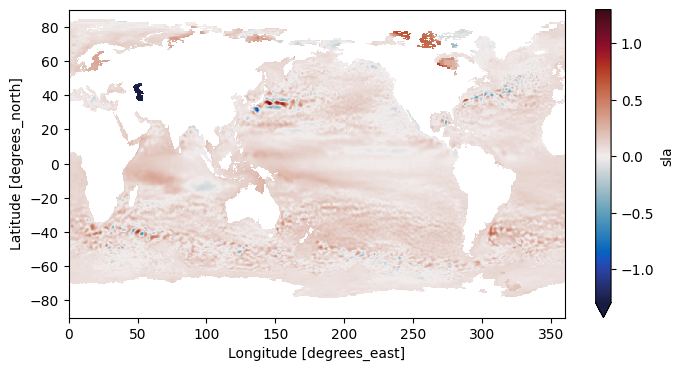

In [7]:
plt.figure(figsize=(8,4))

# calculate difference between sea level anomalies in 2020 and 1993, excluding the time dimension
# returns an array with same dimensions and coordinates as sla
sla_diff = end_year.isel(time=0).sla - start_year.isel(time=0).sla

# plots difference with same kwargs determined above
sla_diff.plot(**kwargs)

# plt.savefig('p4_sla_diff_1993_2020')

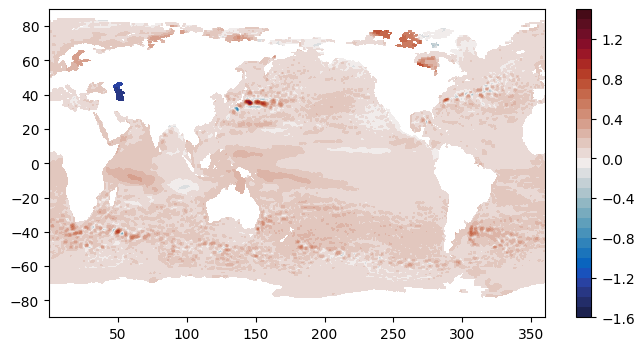

In [8]:
plt.figure(figsize=(8,4))

# extrair os dados do dataset como um array para os dois anos e subtrair
d = end_year.sla.data - start_year.sla.data

# criar um meshgrid para uniformizar os tamanhos das coordenadas e criar um array para os levels do contourf
X,Y = np.meshgrid(annual_mean.longitude, annual_mean.latitude)
l = np.arange(-1.6, 1.6, .1)

# plotar com contourf as coordenadas e selecionar os dados de d para eliminar a terceira dimensão tempo
plt.contourf(X,Y,d[0,:,:],
            cmap=cmo.cm.balance,
            levels=l)

# adicionar colorbar
plt.colorbar()

In [9]:
# exclui a terceira dimensão (tempo)
d[0,:,:]

dask.array<getitem, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>

#### 3.3 Média global do nível médio do mar mensal e anual

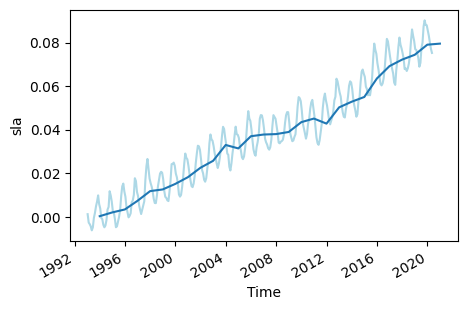

In [10]:
plt.figure(figsize=(5,3))

# fazer as médias globais mensal e anual ao longo das dimensões longitude e latitude
global_amean = annual_mean.sla.mean(dim=['longitude','latitude'])
global_mmean = mf_ds.sla.mean(dim=['longitude','latitude'])

# plotar as médias mensal e anual
global_mmean.plot(c='lightblue')
global_amean.plot()

# plt.savefig('p4_global_means')

#### 3.5 Interpolar dados para Atlântico Sul e Oceano Índico e plotar nível médio do mar

Text(0, 0.5, 'Averaged Sea Level Anomalies [m]')

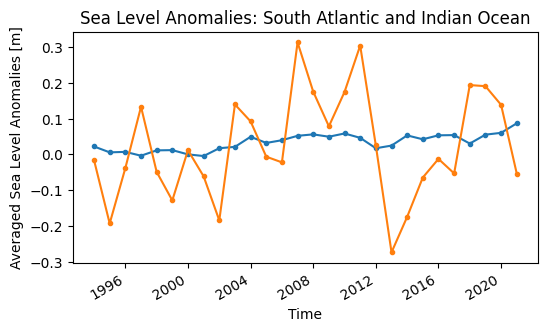

In [11]:
plt.figure(figsize=(6,3))

# interpolates data to new coordinates
atlantic = annual_mean.interp(longitude=320, latitude=-20)

indian = annual_mean.interp(longitude=30, latitude=-40)

# plots annual mean for each coordinate
atlantic.sla.plot(marker='.')
indian.sla.plot(marker='.')

# adjusts plot
plt.title('Sea Level Anomalies: South Atlantic and Indian Ocean')
plt.ylabel(annual_mean.sla.long_name[0:-8] + ' [m]')

# plt.savefig('p4_atl_ind_mean')

### Passo 4: Estimar aumento do nível do mar no oceano mundial

#### 4.1 Tendência do nível do mar globalmente

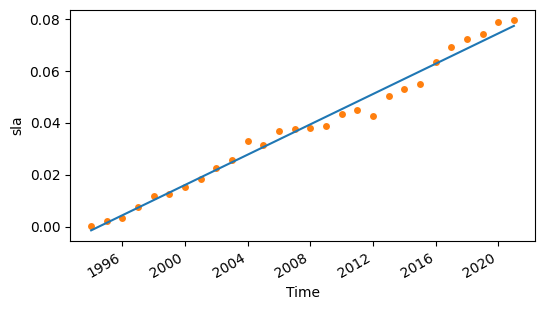

In [12]:
# extracts time values from the annual mean and turns them into floats
t_time = annual_mean.time.values.astype(float)

# calculates linear trend with the global annual mean values
coef = np.polyfit(t_time, global_amean.values, 1)

# calculates linear trend values for plotting
trend = t_time*coef[0] + coef[1]

plt.figure(figsize=(6,3))
global_amean.plot.scatter(c='tab:orange')
plt.plot(annual_mean.time.values, trend)

# plt.savefig('p4_global_trend')

#### 4.2 Tendência do nível do mar

Text(0.5, 1.0, 'South Indian Ocean')

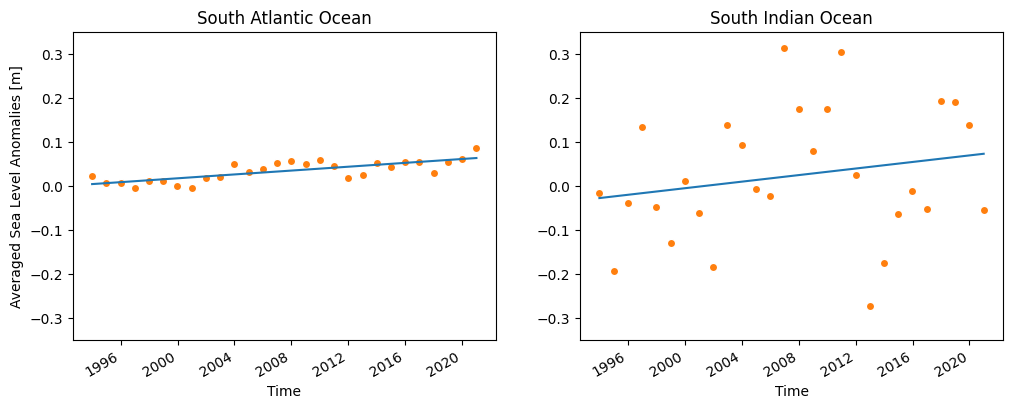

In [13]:
fig = plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=.2)

# calculates coefficients for the atlantic and indian oceans
coef_atl = np.polyfit(t_time, atlantic.sla.values, 1)
coef_ind = np.polyfit(t_time, indian.sla.values, 1)

# calculates trend for the atlantic and indian oceans
trend_atl = t_time*coef_atl[0] + coef_atl[1]
trend_ind = t_time*coef_ind[0] + coef_ind[1]

# plots for the atlantic ocean
ax1 = fig.add_subplot(121)
atlantic.sla.plot.scatter(ylim=(-0.35, 0.35),
                          c='tab:orange')
plt.plot(annual_mean.time.values, trend_atl)

# plots for the indian ocean
ax2 = fig.add_subplot(122)
indian.sla.plot.scatter(add_labels=(True, False),
                        ylim=(-0.35,0.35),
                        c='tab:orange')
plt.plot(annual_mean.time.values, trend_ind)

# plot titles and labels
ax1.set_title('South Atlantic Ocean')
ax1.set_ylabel('Averaged Sea Level Anomalies [m]')
ax2.set_title('South Indian Ocean')

# plt.savefig('p4_atl_ind_trend')

#### 4.3 Discussão

Elaborar discussão:

#### 4.4 Mapa das tendências do nível do mar

In [14]:
am = annual_mean.copy()

# creates an elapsed time variable in years/float not datetime
e_time = (am.time.values - am.time[0].values).astype(float)/1.e9/86400/365

# replaces time coordinate with new variable
am = am.assign_coords({'time':e_time})
am

<xarray.Dataset>
Dimensions:    (time: 28, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * nv         (nv) int32 0 1
  * time       (time) float64 0.0 1.0 2.0 3.003 ... 24.02 25.02 26.02 27.02
Data variables:
    crs        (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               1993-01-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             1993-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

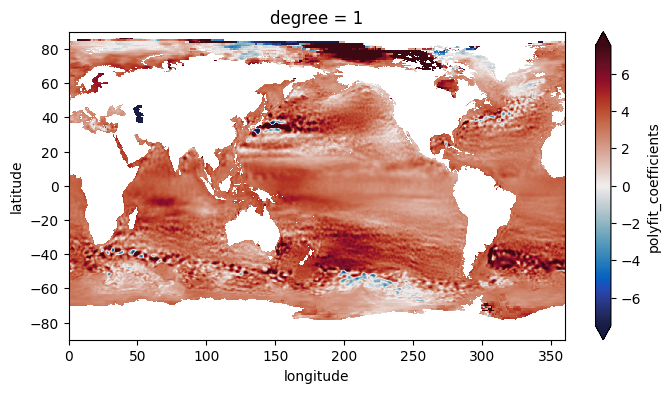

In [15]:
plt.figure(figsize=(8,4))

# adjusts polyfit to sea level anomaly and time, converts it from m to mm
g_trend = am.sla.polyfit('time', 1, skipna=True)*1000

# plots angular polyfit coefficients
g_trend.polyfit_coefficients[0].plot(cmap=cmo.cm.balance,vmin=-7.5, vmax=7.5)

# plt.savefig('p4_trends_map')